# Pre-trained and After tuning word2vecs evaluation

In this notebook we will first evaluate how good the quality of the pre-trained vectors is and then we will see the quality of the vectors already obtained after the LM training.

for estimating vectors, we will find synonyms and antonyms for some words, check if word2vecs can solve some analogies, and after that plot words on the plane, to see if words with similarities make clusters.


In [ ]:
!pip install -U gensim

     |████████████████████████████████| 24.2MB 6.7MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
word2vec = Word2Vec.load("/content/drive/MyDrive/demetre_{pipia, uridia}/resources/word2vec.model_paragraph_all_only_georgian_shuffled_3M_30it")

**Words with Multiple Meanings**

In [ ]:
word2vec.wv.most_similar("სილა")

[('გააწნა', 0.729386568069458),
 ('გავაწანი', 0.7147606015205383),
 ('გამაწნა', 0.6759832501411438),
 ('გაერტყა', 0.6513462066650391),
 ('უთავაზა', 0.5788317918777466),
 ('წიხლი', 0.5784150958061218),
 ('გამარტყა', 0.569734513759613),
 ('ჩასჩურჩულა', 0.5666040778160095),
 ('დააყარა', 0.5660226345062256),
 ('ამოიკვნესა', 0.564782977104187)]

სილას ქართულში ორი მნიშვნელობა აქვს, როგორც სახეში გარტყმა (ამის შესაბამისი სიტყვები გვხვდება: სილა "გააწნა", სილა "გავაწანი", სილა "გაერტყა") და ასევე როგორც ქვიშა, ამიტომ მსგავსი კონტექსტი აქვს სიტყვას "დააყარა"(სილა დააყარა).

In [ ]:
word2vec.wv.most_similar("წელი")

[('წელიწადი', 0.8397859334945679),
 ('წელიც', 0.8122638463973999),
 ('თვე', 0.7607247233390808),
 ('წლისა', 0.7437652945518494),
 ('დღე', 0.6658779978752136),
 ('წლები', 0.664325475692749),
 ('წლით', 0.6505492329597473),
 ('წლისას', 0.6498648524284363),
 ('კვირა', 0.6388163566589355),
 ('საუკუნე', 0.6368224620819092)]

წელსაც ორი მნიშვნელობა აქვს, თუმცა მოცემულ ტექსტში ძირითადად როგორც დროის მნიშვნელობით გვევლინებოდა და შესაბამისად მხოლოდ მისი ერთი მნიშვნელობის სინონიმები ან მასთან დაკაავშირებული სიტყვები გვხვდება

**Synonyms & Antonyms**

In [ ]:
word2vec.wv.most_similar("მშვენიერი")

[('ლამაზი', 0.8420426845550537),
 ('არაჩვეულებრივი', 0.8214867115020752),
 ('საოცარი', 0.7867075204849243),
 ('დიდებული', 0.7265579700469971),
 ('გასაოცარი', 0.7260792255401611),
 ('საუცხოო', 0.7253862619400024),
 ('კარგი', 0.7209930419921875),
 ('შესანიშნავი', 0.7135215401649475),
 ('ულამაზესი', 0.7125148177146912),
 ('მხიარული', 0.6875621676445007)]

როგორც ხედავთ "მშვენივრად" იპოვა სინონიმები

In [ ]:
word2vec.wv.most_similar("მაღალი")

[('დაბალი', 0.9115073680877686),
 ('მაღლი', 0.762312114238739),
 ('მარალი', 0.7011095285415649),
 ('ფართო', 0.6374143362045288),
 ('დაბალია', 0.6370543241500854),
 ('მაღალია', 0.6355365514755249),
 ('უმაღლესი', 0.6288471221923828),
 ('მინიმალური', 0.623460054397583),
 ('დაბალ', 0.6142180562019348),
 ('მაღალ', 0.600111722946167)]

ამ შემთხვევაში მაღალთან ყველაზე მსგავსი სიტყვა ამოაგდო დაბალი.
სავარაუდოა, რომ ერთი და იგივე კონტექსტის წინადადებებში "მაღალი" და "დაბალი" ხშირად ანაცვლებენ ერთმანეთს.
ალბათ ნებისმიერ წინადადებაში შეიძლება მათი ერთმანეთით ჩანაცვლება, ისე რომ წინადადება აზრიანი დარჩეს. უფრო ნაკლებად გვხვდება ერთმნაეთთან მსგავს კონტექსტში მაღალი და უმაღლესი.


**Solving Analogies**

In [ ]:
word2vec.wv.most_similar(positive=['გოგო', 'ქმარი'], negative=['ბიჭი'])

[('ცოლი', 0.8019391298294067),
 ('ქმარივით', 0.7068041563034058),
 ('შვილი', 0.7023085951805115),
 ('დედამთილი', 0.700994610786438),
 ('ქმარ', 0.7006902694702148),
 ('დაქალი', 0.6978672742843628),
 ('ცოლიც', 0.6914170980453491),
 ('მეუღლე', 0.6692677140235901),
 ('მამამთილი', 0.664460301399231),
 ('შეყვარებული', 0.6641018390655518)]

ანალოგია არის შემდეგი: ბიჭი - ქმარი : გოგო - ?. ცოლი არის სწორი პასუხი, სქესის მიხედვით შეძლო ანალოგიის ამოხსნა.

In [ ]:
word2vec.wv.most_similar(positive=['ქალი', 'მეფე'], negative=['კაცი'])

[('დედოფალი', 0.7543380260467529),
 ('პრინცესა', 0.6602231860160828),
 ('მეფედ', 0.6583357453346252),
 ('დედოფლად', 0.6401000618934631),
 ('ერცჰერცოგი', 0.6390016674995422),
 ('უფლისწული', 0.6362884044647217),
 ('ლიზელოტა', 0.633010745048523),
 ('კრონპრინც', 0.632745087146759),
 ('ელისაბედი', 0.6322320699691772),
 ('დოროთეა', 0.6304565668106079)]

ანალოგია არის შემდეგი: კაცი - მეფე : ქალი - ?. სწორი პასუხია დედოფალი, წინა მაგალითის მსგავსი ანალოგიაა.

In [ ]:
word2vec.wv.most_similar(positive=['თევზი', 'დარბის'], negative=['ძაღლი'])

[('ცურავენ', 0.6150200963020325),
 ('ცურავს', 0.6113138198852539),
 ('დაცურავს', 0.5872666835784912),
 ('დაცოცავს', 0.5579556226730347),
 ('მიგრირებს', 0.5552483797073364),
 ('დასრიალებენ', 0.5440467000007629),
 ('იჭრება', 0.5435172319412231),
 ('ხტის', 0.5343250036239624),
 ('იყრება', 0.5333105325698853),
 ('იკვებება', 0.5328798890113831)]

ანალოგია არის შემდეგი: ძაღლი - დარბის : თევზი - ?. სწორი პასუხია ცურავს ან დაცურავს. ამ შემთხვევაში ოდნავ გაუჭირდა რიცხვში ზმნის შესაბამება.

**Bias in Word Vectors**


In [ ]:
word2vec.wv.most_similar(positive=['ქალი', 'მუშა'], negative=['კაცი'])

[('მკერავი', 0.5220461487770081),
 ('საყოფაცხოვრებო', 0.48746219277381897),
 ('მკერავის', 0.47810664772987366),
 ('თეთრკანიანი', 0.4779757261276245),
 ('მამაკაცისა', 0.4775031805038452),
 ('მტვირთავის', 0.4768024682998657),
 ('კვების', 0.47136709094047546),
 ('პროფესიონალი', 0.4633418619632721),
 ('არამწეველი', 0.46027860045433044),
 ('ელექტრო', 0.4580596089363098)]

როგორც ხედავთ bias გვაქვს word vector-ებში. როცა კაცის საქმიაობა არის მუშა, ქალს მკერავობა შეუსაბამა. იმას რომ ბაისი გვაქვს ვორდ ვექტორებში, პირველ რიგში განსაზღვრებს ის მონაცემები რომელზეც ისწავლა ალგორითმა.

**Plot Analysis**

In [ ]:
def reduce_to_k_dim(M, k=2):   
    """ Reduce matrix of dimensionality (num_corpus_words, embedding_size)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
    
        Params:
            M (numpy matrix of shape (number of unique words in the corpus , embbedings size))
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """  
    svd = TruncatedSVD(n_components=k, n_iter=10)
    M_reduced = svd.fit_transform(M)

    return M_reduced

In [ ]:
def plot_embeddings(M_reduced, words):
    """ Plot in a scatterplot the embeddings of the words specified in the list "words".
        Include a label next to each point.
        
        Params:
            M_reduced (numpy matrix of shape (number of unique words in the corpus , 2)): matrix of 2-dimensioal word embeddings
            words (list of strings): words whose embeddings we want to visualize
    """
    for i, word in enumerate(words):
        x = M_reduced[i][0]
        y = M_reduced[i][1]
        plt.plot(x, y, 'rx')
        plt.text(x, y, word, fontsize=9)

    plt.show()

In [ ]:
words = ['ყავა', 'მეფე', 'დედოფალი', 'დეპუტატი', 'მინისტრი', 'პრეზიდენტი',
         'თავადი', 'მთა', 'კლდე', 'ბარი', 'მეჭურჭლეთუხუცესი', 'სპორტი', 'კრიკეტი', 'კალათბურთი']

In [ ]:
def get_normilized_embeddings(word2vec, words):
    embeddings = np.array([word2vec.wv.__getitem__(word) for word in words])
    X_embedded = reduce_to_k_dim(embeddings)

    # Rescale (normalize) the rows to make them each of unit-length
    M_lengths = np.linalg.norm(X_embedded, axis=1)
    M_normalized = X_embedded / M_lengths[:, np.newaxis]

    return M_normalized


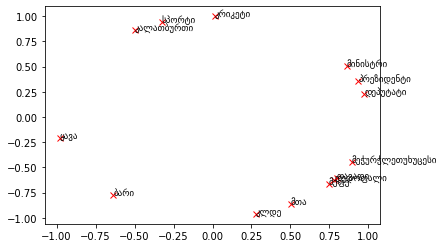

In [ ]:
plot_embeddings(get_normilized_embeddings(word2vec, words), words)

თუ შევხედავთ გრაფიკს, გამოყოფილია რამდენიმე კლასტერი, მაგალითად ერთად გაერთიანდნენ: მინისტრი, პრეზიდენტი, დეპუტატი(სავარაუდოდ თანამედროვე პოლიტიკური ტექსტებიდან მსგავსი კონტექსტი აქვთ). ამის შესაბისად ვხვდებით: თავადი, მეფე, დედოფალი, მეჭურჭლეთუხუცესი. 

გამოყოფილია ასევე სპორტის კლასტერი: სპორტი, კალათბურთი და კრიკეტი. კრიკეტი ოდნავ მოშორებითაა, ალბათ იმიტომ რომ ტექსტში შედარებით იშვიათად გვხვდება ვიდრე კალათბურთი, რადგან საქართველოში ნაკლებად ცნობილი სპორტია.

გრაფიკზე დავინახავთ, რომ მთა და კლდე ახლოს არიან ერთმანეთთან, შეგვიძლია ერთ კლასტერად ვიგულისხმოთ. ყველაზე საინტერსო არის სიტყვა "ბარის" პოზიცია გრაფიკზე, რადგან ბარს ორი მნიშვნელობა აქვს. ერთი, როგორც კაფე-ბარი და მეორე, როგორ მთა-ბარი, შესაბამისაც ბარი დაახლოებით შუაშია მოქცეული ყავასა და მთას შორის.

# Load Embeddings from Trained model

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
after_model_train = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/demetre_{pipia, uridia}/resources/word2vec_from_trained_model", binary=False)

**Synonyms & Antonyms**


In [ ]:
after_model_train.wv.most_similar("მშვენიერი")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:2389: RuntimeWarning: divide by zero encountered in true_divide
  return (m / dist).astype(REAL)


[('არაჩვეულებრივი', 0.7883881330490112),
 ('ლამაზი', 0.738557755947113),
 ('საოცარი', 0.7374485731124878),
 ('საუცხოო', 0.6601731777191162),
 ('გასაოცარი', 0.6509650349617004),
 ('დიდებული', 0.6498785018920898),
 ('ზღაპრული', 0.6336911916732788),
 ('ბრწყინვალე', 0.6263254880905151),
 ('გადასარევი', 0.6209696531295776),
 ('ჯადოსნური', 0.6112933158874512)]

In [ ]:
after_model_train.wv.most_similar("მაღალი")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('დაბალი', 0.8893759250640869),
 ('მინიმალური', 0.6187927722930908),
 ('სოლიდური', 0.6060376763343811),
 ('დიდი', 0.5813535451889038),
 ('დაბალია', 0.5808201432228088),
 ('ფართო', 0.5735613703727722),
 ('დაბალ', 0.5734773874282837),
 ('თანაბარი', 0.5721690654754639),
 ('სტაბილური', 0.5708698034286499),
 ('უმაღლესი', 0.5623353123664856)]

წინასწარ დატრენინგებული ვექტორების მსგავსად, ამ word2vec-ებმაც მსგავსად იპოვეს სინონიმი და ანტონიმი მოცემული სიტყვებისთვის.

**Words with Multiple Meanings**

In [ ]:
after_model_train.wv.most_similar("სილა")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('გააწნა', 0.7147157788276672),
 ('კეფა', 0.6592196822166443),
 ('ლოყა', 0.6213541030883789),
 ('წიხლი', 0.600777268409729),
 ('გაუყარა', 0.59055095911026),
 ('მაკოცა', 0.5782253742218018),
 ('თეთრა', 0.5702856779098511),
 ('ტკივილისგან', 0.5694239735603333),
 ('გადამეხვია', 0.5638878345489502),
 ('ვნებიანად', 0.5622962713241577)]

აქ მსგავს სიტყვებს თუ დავაკვირდებით სილას, როგორც სახეში გარტყმას, ისე აღიქვამს მხოლოდ. ალბათ LM მოდელში სწავლებისას, ძირითადად ის ტექსტები შეხვდა, სადაც სილა ამ მნიშვნელობითაა.

**Solving Analogies**

In [ ]:
after_model_train.wv.most_similar(positive=['გოგო', 'ქმარი'], negative=['ბიჭი'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('ცოლი', 0.7700845003128052),
 ('დედა', 0.7091073989868164),
 ('ქმარ', 0.6770231127738953),
 ('დედამთილი', 0.6757177114486694),
 ('შვილი', 0.670648992061615),
 ('დაქალი', 0.6659032106399536),
 ('ცოლიც', 0.6657741069793701),
 ('შეყვარებული', 0.6631277799606323),
 ('მეუღლე', 0.653969407081604),
 ('დედამისი', 0.6412578821182251)]

In [ ]:
after_model_train.wv.most_similar(positive=['ქალი', 'მეფე'], negative=['კაცი'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('დედოფალი', 0.6531268954277039),
 ('მეფედ', 0.6167320013046265),
 ('დედოფლად', 0.5721642971038818),
 ('პრინცესა', 0.5713459253311157),
 ('დედოფალ', 0.5672929286956787),
 ('მეფეც', 0.5645745992660522),
 ('მეფის', 0.5622585415840149),
 ('გვირგვინოსანი', 0.5576256513595581),
 ('უფლისწული', 0.5563797354698181),
 ('ტახტზე', 0.5539857745170593)]

In [ ]:
after_model_train.wv.most_similar(positive=['თევზი', 'დარბის'], negative=['ძაღლი'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('ორაგული', 0.5136852264404297),
 ('მარილს', 0.49479761719703674),
 ('ქონი', 0.4903636872768402),
 ('ზომისაა', 0.4841603934764862),
 ('მიირთმევს', 0.47752845287323),
 ('დაცურავს', 0.47715887427330017),
 ('გაფუჭდეს', 0.46413207054138184),
 ('ფსკერს', 0.45726174116134644),
 ('კალმახი', 0.45664554834365845),
 ('იყრება', 0.4549938440322876)]

In [ ]:
after_model_train.wv.most_similar(positive=['ქალი', 'მუშა'], negative=['კაცი'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('დაოჯახებული', 0.497544527053833),
 ('თვითნასწავლი', 0.48983922600746155),
 ('მზრუნველი', 0.48913103342056274),
 ('ტყუპი', 0.47836431860923767),
 ('დიასახლისი', 0.4718446433544159),
 ('პროფესიონალი', 0.4697452783584595),
 ('მშრომელი', 0.4673280119895935),
 ('პორნოვარსკვლავი', 0.46622300148010254),
 ('მსახიობების', 0.45507580041885376),
 ('მამაკაცი', 0.4533017873764038)]

ანალოგიები კვლავ კარგად ამოხსნა, ერთადერთი მესამე ანალოგიაში, "დაცურავს" შედარებით ქვევით გვხვდება. bias შენარჩუნდა მეოთხე ანალოგიაშიც, თუმცა მკერავის ნაცვლად, ახლა დაოჯახებული ამოაგდო. 

**Plot Analysis**

In [ ]:
new_words = ['მეფე', 'დედოფალი', 'კალათბურთი', 'ფეხბურთი', 'ზღვა', 'ტბა', 
             'დეპუტატი', 'თავადი', 'სპორტი', 'მინისტრი', 'პრეზიდენტი', 'მდინარე',]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


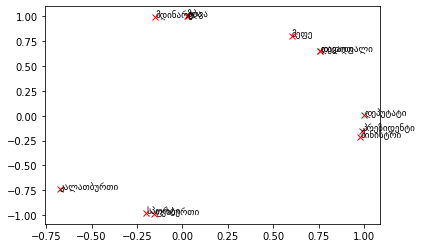

In [ ]:
plot_embeddings(get_normilized_embeddings(after_model_train, new_words), new_words)

თუ შევხედავთ ნახაზს, კარგად გამოყო სიტყვები კლასტერებად.

პირველი კლასტერი: მდინარე, ზღვა, ტბა.
მეორე კლასტერი: მეფე, დედოფალი, თავადი.
მესამე კლასტერი: დეპუტატი, პრეზიდენტი, მინისტრი.
მეოთხე კლასტერი: კალათბურთი, სპორტი, ფეხბურთი. (კალათბურთი შედარებით მოშორებითაა, თუმცა მთლიან ნახაზთან მიმართებაში, მაინც შეგვიძლია ამ კლასტერს მივაკუთვნოთ)